In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## read CSV file
df = pd.read_csv('D:\\Python\\Data_Analysis\\Logistic-Regression\\adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
## cleaning data
df[df == '?'] = np.nan


In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10328\2980583491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [7]:
X = df.drop(['income'], axis=1)
y = df['income']

In [8]:
y = y.map({'<=50K': 0, '>50K': 1})

In [9]:
## Label Encoding for categorical features
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X[feature] = le.fit_transform(X[feature])

In [10]:
## Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.svm import SVC

In [12]:
svc = SVC(kernel='linear')

In [13]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
svc.coef_

array([[ 2.43812665e+03, -1.89209519e+02, -5.78563124e-01,
         1.28092979e+03,  5.67085432e+03, -1.68392096e+03,
         4.48611402e+02, -2.26829552e+03,  4.69452121e+02,
         6.99243295e+02,  2.68372353e+01,  5.52411798e+01,
         2.30975190e+03,  3.75715103e+02]])

In [15]:
y_pred = svc.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7941040994933211
Confusion Matrix:
 [[4735  241]
 [1100  437]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      4976
           1       0.64      0.28      0.39      1537

    accuracy                           0.79      6513
   macro avg       0.73      0.62      0.64      6513
weighted avg       0.77      0.79      0.76      6513



In [17]:
rbf = SVC(kernel='rbf')

In [18]:
rbf.fit(X_train, y_train)

SVC()

In [19]:
y_pred1 = rbf.predict(X_test)

In [20]:
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred1))
print("RBF Kernel Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("RBF Kernel Classification Report:\n", classification_report(y_test, y_pred1))

RBF Kernel Accuracy: 0.7959465684016582
RBF Kernel Confusion Matrix:
 [[4969    7]
 [1322  215]]
RBF Kernel Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      4976
           1       0.97      0.14      0.24      1537

    accuracy                           0.80      6513
   macro avg       0.88      0.57      0.56      6513
weighted avg       0.83      0.80      0.73      6513



In [21]:
polynimial = SVC(kernel='poly')
polynimial.fit(X_train, y_train)

SVC(kernel='poly')

In [22]:
y_pred2 = polynimial.predict(X_test)

In [23]:
print("polynimial Kernel Accuracy:", accuracy_score(y_test, y_pred2))
print("polynimial Kernel Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("polynimial Kernel Classification Report:\n", classification_report(y_test, y_pred2))

polynimial Kernel Accuracy: 0.7832028251189928
polynimial Kernel Confusion Matrix:
 [[4947   29]
 [1383  154]]
polynimial Kernel Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.88      4976
           1       0.84      0.10      0.18      1537

    accuracy                           0.78      6513
   macro avg       0.81      0.55      0.53      6513
weighted avg       0.80      0.78      0.71      6513



In [24]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [25]:
y_pred3 = sigmoid.predict(X_test)

In [26]:
print("sigmoid Kernel Accuracy:", accuracy_score(y_test, y_pred3))
print("sigmoid Kernel Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("sigmoid Kernel Classification Report:\n", classification_report(y_test, y_pred3))


sigmoid Kernel Accuracy: 0.6499309074159374
sigmoid Kernel Confusion Matrix:
 [[3837 1139]
 [1141  396]]
sigmoid Kernel Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      4976
           1       0.26      0.26      0.26      1537

    accuracy                           0.65      6513
   macro avg       0.51      0.51      0.51      6513
weighted avg       0.65      0.65      0.65      6513



In [27]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
f1_score_rbf = f1_score(y_test, y_pred1)
print("F1 Score RBF:", f1_score_rbf)
f1_score_poly = f1_score(y_test, y_pred2)
print("F1 Score Polynomial:", f1_score_poly)
f1_score_sigmoid = f1_score(y_test, y_pred3)
print("F1 Score Sigmoid:", f1_score_sigmoid)

F1 Score: 0.3945823927765237
F1 Score RBF: 0.24445707788516202
F1 Score Polynomial: 0.17906976744186046
F1 Score Sigmoid: 0.2578125


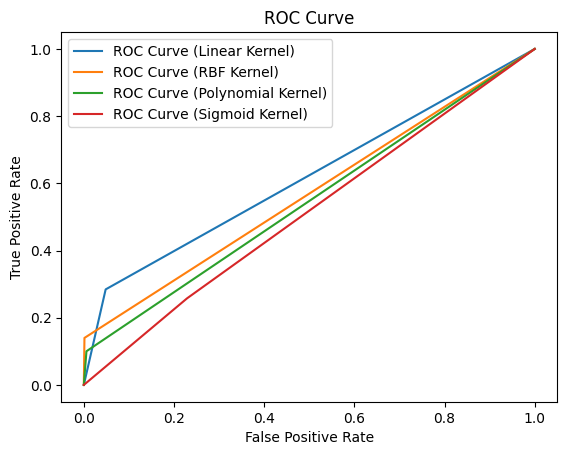

In [28]:
## roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC Curve (Linear Kernel)')
fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_test, y_pred1)
plt.plot(fpr_rbf, tpr_rbf, label='ROC Curve (RBF Kernel)')
fpr_poly, tpr_poly, thresholds_poly = roc_curve(y_test, y_pred2)
plt.plot(fpr_poly, tpr_poly, label='ROC Curve (Polynomial Kernel)')
fpr_sigmoid, tpr_sigmoid, thresholds_sigmoid = roc_curve(y_test, y_pred3)
plt.plot(fpr_sigmoid, tpr_sigmoid, label='ROC Curve (Sigmoid Kernel)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

1
